In [36]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

In [37]:
# import the US-based youtube dataset
df = pd.read_csv('USvideos.csv')

df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [38]:
df.isnull().sum()

video_id                    0
trending_date               0
title                       0
channel_title               0
category_id                 0
publish_time                0
tags                        0
views                       0
likes                       0
dislikes                    0
comment_count               0
thumbnail_link              0
comments_disabled           0
ratings_disabled            0
video_error_or_removed      0
description               570
dtype: int64

In [39]:
df.dtypes

video_id                  object
trending_date             object
title                     object
channel_title             object
category_id                int64
publish_time              object
tags                      object
views                      int64
likes                      int64
dislikes                   int64
comment_count              int64
thumbnail_link            object
comments_disabled           bool
ratings_disabled            bool
video_error_or_removed      bool
description               object
dtype: object

In [40]:
columns_to_drop = ['video_id', 'trending_date', 'thumbnail_link', 'comments_disabled', 'ratings_disabled', 'video_error_or_removed', 'comment_count']
df.drop(columns_to_drop, inplace=True, axis=1)

df.head()

,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,description
0,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,"One year after the presidential election, John..."
2,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,Today we find out if Link is a Nickelback amat...
4,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,I know it's been a while since we did this sho...


## Create our target variable (popularity)
Let's take a look at the distribution of the columns that will be used to calculate engagement score.


In [41]:
# summary stats on `views` `likes` `dislikes` and their scaled versions
print("Summary Stats on Views")
print(df['views'].describe())
print("\nSummary Stats on Likes")
print(df['likes'].describe())
print("\nSummary Stats on Dislikes")
print(df['dislikes'].describe())

Summary Stats on Views
count    4.094900e+04
mean     2.360785e+06
std      7.394114e+06
min      5.490000e+02
25%      2.423290e+05
50%      6.818610e+05
75%      1.823157e+06
max      2.252119e+08
Name: views, dtype: float64

Summary Stats on Likes
count    4.094900e+04
mean     7.426670e+04
std      2.288853e+05
min      0.000000e+00
25%      5.424000e+03
50%      1.809100e+04
75%      5.541700e+04
max      5.613827e+06
Name: likes, dtype: float64

Summary Stats on Dislikes
count    4.094900e+04
mean     3.711401e+03
std      2.902971e+04
min      0.000000e+00
25%      2.020000e+02
50%      6.310000e+02
75%      1.938000e+03
max      1.674420e+06
Name: dislikes, dtype: float64


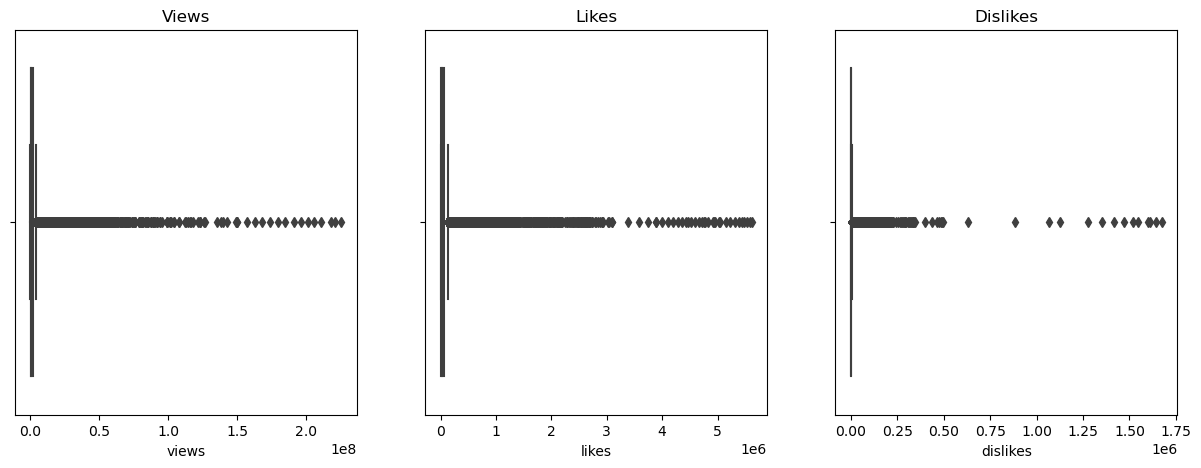

In [42]:
# create boxplots for `views` `likes` `dislikes`
figure, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.boxplot(ax=axes[0], data=df, x='views')
axes[0].set_title('Views')
sns.boxplot(ax=axes[1], data=df, x='likes')
axes[1].set_title('Likes')
sns.boxplot(ax=axes[2], data=df, x='dislikes')
axes[2].set_title('Dislikes')
plt.show()

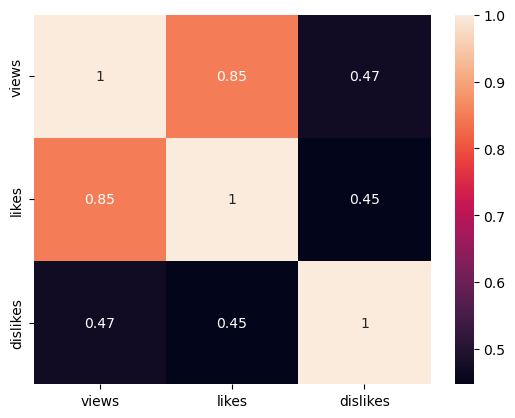

In [43]:
# create heat map of correlations between `views` `likes` `dislikes`
corr = df[['views', 'likes', 'dislikes']].corr()
sns.heatmap(corr, annot=True)
plt.show()


We will scale our `views`, `likes` and `dislikes` columns before we create our engagement score to see if they are a better choice. We will use StandardScaling() as it is less sensitive to outliers. We will look at the distribution of engagement scores to see if we need to transform it.

In [44]:
# scale the views, likes, dislikes

# initialize the scaler
scaler = StandardScaler()

# define columns to be standardized
columns_to_scale = ['views', 'likes', 'dislikes']
scaled_column_names = ['views_scaled', 'likes_scaled', 'dislikes_scaled']

# fit the scaler
df[scaled_column_names] = scaler.fit_transform(df[columns_to_scale])

# check the scaled data
df.head()


,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,description,views_scaled,likes_scaled,dislikes_scaled
0,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,SHANTELL'S CHANNEL - https://www.youtube.com/s...,-0.218069,-0.073137,-0.025677
1,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,"One year after the presidential election, John...",0.007844,0.100131,0.083867
2,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,0.112341,0.313551,0.056067
3,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,Today we find out if Link is a Nickelback amat...,-0.272871,-0.280033,-0.104908
4,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,I know it's been a while since we did this sho...,-0.035847,0.253267,-0.059333


In [45]:
# create an engagement score column based on the views, likes, dislikes
# the sum of `likes` and `dislikes` divided by the `view` count

df['engagement_score_scaled'] = (df['likes_scaled'] + df['dislikes_scaled']) / df['views_scaled']
df['engagement_score'] = (df['likes'] + df['dislikes']) / df['views']

df.head()

,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,description,views_scaled,likes_scaled,dislikes_scaled,engagement_score_scaled,engagement_score
0,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,SHANTELL'S CHANNEL - https://www.youtube.com/s...,-0.218069,-0.073137,-0.025677,0.453132,0.080833
1,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,"One year after the presidential election, John...",0.007844,0.100131,0.083867,23.457319,0.042720
2,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,0.112341,0.313551,0.056067,3.290155,0.047431
3,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,Today we find out if Link is a Nickelback amat...,-0.272871,-0.280033,-0.104908,1.410705,0.031582
4,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,I know it's been a while since we did this sho...,-0.035847,0.253267,-0.059333,-5.410032,0.064046


In [46]:
# get stats for engagement score
print('Engagement Score Stats')
print(df['engagement_score'].describe())
print('Engagement Score Scaled Stats')
print(df['engagement_score_scaled'].describe())

Engagement Score Stats
count    40949.000000
mean         0.036027
std          0.027145
min          0.000000
25%          0.016705
50%          0.030038
75%          0.048454
max          0.294794
Name: engagement_score, dtype: float64
Engagement Score Scaled Stats
count     40949.000000
mean          9.956235
std        1753.889100
min       -8692.079336
25%           1.199363
50%           1.419415
75%           1.607763
max      354741.003924
Name: engagement_score_scaled, dtype: float64


It appears that the engagement score of the unscaled data is heavily skewed. We will use the unscaled engagement score for our analysis as it is more interpretable.

/tmp/ipykernel_16776/2770168582.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['engagement_score'], kde=False)


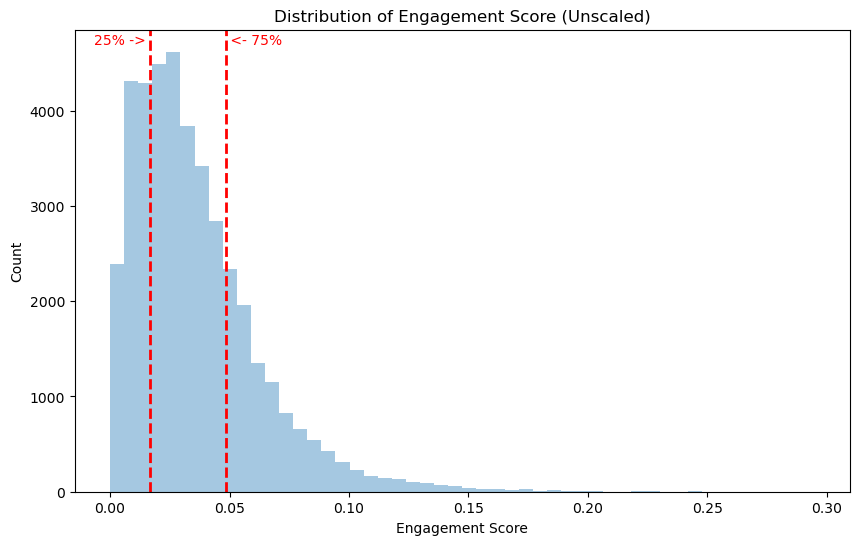

In [47]:
# plot the distribution of the engagement score for both scaled and unscaled data

# plot the unscaled data
plt.figure(figsize=(10, 6))
sns.distplot(df['engagement_score'], kde=False)
plt.title('Distribution of Engagement Score (Unscaled)')
plt.xlabel('Engagement Score')
plt.ylabel('Count')
# add line at interquartile range
plt.axvline(df['engagement_score'].describe()['25%'], color='red', linestyle='dashed', linewidth=2)
plt.axvline(df['engagement_score'].describe()['75%'], color='red', linestyle='dashed', linewidth=2)
# add text to indicate interquartile range
plt.text(df['engagement_score'].describe()['25%'], 4700, '25% -> ', color='red', ha='right')
plt.text(df['engagement_score'].describe()['75%'], 4700, ' <- 75%', color='red', ha='left')
plt.show()

We will use the 75% interquartile range as the threshold to deem something popular or not.

In [48]:
popularity_threshold = df['engagement_score'].describe()['75%']
print('Popularity Threshold:', popularity_threshold)

Popularity Threshold: 0.04845439194090305


Create binary `popular` column based on the threshold (0 = not popular, 1 = popular)

In [49]:
# is popular 0 or 1
df['is_popular'] = df['engagement_score'].apply(lambda x: 1 if x >= popularity_threshold else 0)

df.head()

,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,description,views_scaled,likes_scaled,dislikes_scaled,engagement_score_scaled,engagement_score,is_popular
0,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,SHANTELL'S CHANNEL - https://www.youtube.com/s...,-0.218069,-0.073137,-0.025677,0.453132,0.080833,1
1,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,"One year after the presidential election, John...",0.007844,0.100131,0.083867,23.457319,0.042720,0
2,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,0.112341,0.313551,0.056067,3.290155,0.047431,0
3,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,Today we find out if Link is a Nickelback amat...,-0.272871,-0.280033,-0.104908,1.410705,0.031582,0
4,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,I know it's been a while since we did this sho...,-0.035847,0.253267,-0.059333,-5.410032,0.064046,1


In [50]:
# remove the columns that are no longer needed
columns_to_drop = ['views', 'likes', 'dislikes', 'views_scaled', 'likes_scaled', 'dislikes_scaled', 'engagement_score_scaled']

df.drop(columns_to_drop, inplace=True, axis=1)

df.head()

,title,channel_title,category_id,publish_time,tags,description,engagement_score,is_popular
0,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,SHANTELL'S CHANNEL - https://www.youtube.com/s...,0.080833,1
1,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...","One year after the presidential election, John...",0.042720,0
2,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,0.047431,0
3,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",Today we find out if Link is a Nickelback amat...,0.031582,0
4,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",I know it's been a while since we did this sho...,0.064046,1


We will cleanup the text based columns like `title`, `description`, and `tags` by converting it to lowercase, removing punctuation, stop words, and lemmatizing the words.

In [51]:
df['title']

0                       WE WANT TO TALK ABOUT OUR MARRIAGE
1        The Trump Presidency: Last Week Tonight with J...
2        Racist Superman | Rudy Mancuso, King Bach & Le...
3                         Nickelback Lyrics: Real or Fake?
4                                 I Dare You: GOING BALD!?
                               ...                        
40944                         The Cat Who Caught the Laser
40945                           True Facts : Ant Mutualism
40946    I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...
40947                  How Black Panther Should Have Ended
40948    Official Call of Duty®: Black Ops 4 — Multipla...
Name: title, Length: 40949, dtype: object

In [67]:
import nltk

nltk.download('punkt')
nltk.download('stopwords')




[nltk_data] Downloading package punkt to /home/sfirestone/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/sfirestone/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [68]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string

# Download the stopwords corpus (only required for the first time)
nltk.download('stopwords')

nltk.data.path.append(nltk.data.path[0])

# Get the set of stopwords
stopwords_set = set(stopwords.words('english'))

# Create a WordNet Lemmatizer
lemmatizer = WordNetLemmatizer()

# Function to clean the text
def clean_text(text):
    if isinstance(text, str):
        # Remove punctuation and special characters
        text = text.translate(str.maketrans('', '', string.punctuation))
        # Convert to lowercase
        text = text.lower()
        # Remove stop words
        text = ' '.join(word for word in text.split() if word not in stopwords_set)
    else:
        text = ''
    return text

# Function to perform lemmatization on text
def lemmatize_text(text):
    if isinstance(text, str):
        # Tokenize the text
        tokens = nltk.word_tokenize(text)
        # Lemmatize each token
        lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
        # Remove stopwords
        lemmatized_text = ' '.join(token for token in lemmatized_tokens if token not in stopwords_set)
    else:
        lemmatized_text = ''
    return lemmatized_text

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/sfirestone/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [53]:
# Clean the text in the 'title' column
df['title'] = df['title'].apply(clean_text)

df.head()


,title,channel_title,category_id,publish_time,tags,description,engagement_score,is_popular
0,want talk marriage,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,SHANTELL'S CHANNEL - https://www.youtube.com/s...,0.080833,1
1,trump presidency last week tonight john oliver...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...","One year after the presidential election, John...",0.042720,0
2,racist superman rudy mancuso king bach lele pons,Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,0.047431,0
3,nickelback lyrics real fake,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",Today we find out if Link is a Nickelback amat...,0.031582,0
4,dare going bald,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",I know it's been a while since we did this sho...,0.064046,1


In [54]:
# Clean the text in the 'description' column
df['description'] = df['description'].apply(clean_text)

df.head()

,title,channel_title,category_id,publish_time,tags,description,engagement_score,is_popular
0,want talk marriage,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,shantells channel httpswwwyoutubecomshantellma...,0.080833,1
1,trump presidency last week tonight john oliver...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",one year presidential election john oliver dis...,0.042720,0
2,racist superman rudy mancuso king bach lele pons,Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",watch previous video ▶ nnsubscribe ► httpswwwy...,0.047431,0
3,nickelback lyrics real fake,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",today find link nickelback amateur secret nick...,0.031582,0
4,dare going bald,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",know since show back might best episode yetnle...,0.064046,1


In [56]:
# Clean the text in the 'tags' column
df['tags'] = df['tags'].apply(clean_text)

# Display the updated DataFrame
df.head()

,title,channel_title,category_id,publish_time,tags,description,engagement_score,is_popular
0,want talk marriage,CaseyNeistat,22,2017-11-13T17:13:01.000Z,shantell martin,shantells channel httpswwwyoutubecomshantellma...,0.080833,1
1,trump presidency last week tonight john oliver...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,last week tonight trump presidencylast week to...,one year presidential election john oliver dis...,0.042720,0
2,racist superman rudy mancuso king bach lele pons,Rudy Mancuso,23,2017-11-12T19:05:24.000Z,racist supermanrudymancusokingbachracistsuperm...,watch previous video ▶ nnsubscribe ► httpswwwy...,0.047431,0
3,nickelback lyrics real fake,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,rhett linkgmmgood mythical morningrhett link g...,today find link nickelback amateur secret nick...,0.031582,0
4,dare going bald,nigahiga,24,2017-11-12T18:01:41.000Z,ryanhigahigatvnigahigai dare youidyrhpcdaresno...,know since show back might best episode yetnle...,0.064046,1


In [69]:
# Apply lemmatization to the 'title' column
df['title'] = df['title'].apply(lemmatize_text)

df.head()

LookupError: 
**********************************************************************
  Resource [93momw-1.4[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('omw-1.4')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/omw-1.4[0m

  Searched in:
    - '/home/sfirestone/nltk_data'
    - '/home/sfirestone/miniconda3/nltk_data'
    - '/home/sfirestone/miniconda3/share/nltk_data'
    - '/home/sfirestone/miniconda3/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
    - '/home/sfirestone/nltk_data'
    - '/home/sfirestone/nltk_data'
**********************************************************************
